In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast 
from oligogym.data import DatasetDownloader

## Load data and filter out experiments that did not run or are not relevant

In [2]:
data = pd.read_csv('./oligogym_benchmarks.csv')
data['model_args'] = data['model_args'].astype(str)
data['featurizer_args'] = data['featurizer_args'].astype(str)
data

,cross_validation,dataset,featurizer,featurizer_args,model,model_args,train_r2_score,train_root_mean_squared_error,train_mean_absolute_error,train_pearson_correlation,train_spearman_correlation,train_fold,test_r2_score,test_root_mean_squared_error,test_mean_absolute_error,test_pearson_correlation,test_spearman_correlation,test_fold
0,nucleobase,openASO,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}",XGBoostModel,"{'max_depth': 30, 'n_estimators': 1000}",0.988843,0.028969,0.004303,0.994407,0.981876,1.0,-0.098265,0.272636,0.229464,0.165544,0.165837,1.0
1,nucleobase,openASO,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}",XGBoostModel,"{'max_depth': 30, 'n_estimators': 1000}",0.988163,0.029346,0.004401,0.994065,0.979890,0.0,-0.194955,0.298107,0.247745,0.111082,0.093098,0.0
2,nucleobase,openASO,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}",XGBoostModel,"{'max_depth': 30, 'n_estimators': 1000}",0.990034,0.027188,0.004069,0.995006,0.985124,4.0,-0.099196,0.276002,0.229835,0.236350,0.228875,4.0
3,nucleobase,openASO,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}",XGBoostModel,"{'max_depth': 30, 'n_estimators': 1000}",0.988815,0.027551,0.004270,0.994393,0.979413,3.0,-0.120285,0.302063,0.253081,0.108997,0.107743,3.0
4,nucleobase,openASO,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}",XGBoostModel,"{'max_depth': 30, 'n_estimators': 1000}",0.987356,0.030619,0.004988,0.993659,0.983968,2.0,0.037207,0.256518,0.212263,0.314235,0.309403,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35440,random,acute_neurotox_lna,OneHotEncoder,{'encode_components': ['base']},NearestNeighborsModel,{'n_neighbors': 5},0.464003,28.686261,21.606307,0.698642,0.675480,2.0,0.094206,35.843846,27.080800,0.430731,0.369241,2.0
35441,random,acute_neurotox_lna,OneHotEncoder,{'encode_components': ['base']},NearestNeighborsModel,{'n_neighbors': 5},0.442135,29.090020,21.871695,0.680330,0.642250,3.0,0.118322,36.147981,28.120186,0.474006,0.443332,3.0
35442,random,acute_neurotox_lna,OneHotEncoder,{'encode_components': ['base']},NearestNeighborsModel,{'n_neighbors': 5},0.439287,29.166434,22.104670,0.679233,0.645195,1.0,0.198799,34.530817,26.067967,0.488589,0.436829,1.0
35443,random,acute_neurotox_lna,OneHotEncoder,{'encode_components': ['base']},NearestNeighborsModel,{'n_neighbors': 5},0.428703,29.335660,22.112353,0.676451,0.647412,0.0,0.165909,35.747136,27.280148,0.483277,0.406986,0.0


## Formatting 

In [3]:
SIRNA_MAP = {
    "siRNAmod": "siRNAmod",
    "sherwood": "Sherwood",
    "siRNA2": "Ichihara",
    "siRNA1": "Huesken",
    "siRNA3": "Shmushkovich"
}

ASO_MAP = {
    "openASO": "OpenASO",
    "asoptimizer_cleaned": "ASOptimizer",
    "immune_modulation_TLR7": "TLR7",
    "immune_modulation_TLR8": "TLR8",
    "cytotox_lna": "Cytotox LNA",
    "acute_neurotox_lna": "Neurotox LNA",
    "acute_neurotox_moe_cleaned": "Neurotox MOE"
}

SIRNA_DATA = [
    "siRNAmod", 
    "Sherwood", 
    "Ichihara",
    "Huesken",
    "Shmushkovich"
]

ASO_DATA = [
    "OpenASO", 
    "ASOptimizer",
    "TLR7",
    "TLR8",
    "Cytotox LNA",
    "Neurotox LNA",
    "Neurotox MOE"
]

MODEL_MAP = {
    "XGBoostModel": "XGB",
    "NearestNeighborsModel": "KNN",
    "RandomForestModel": "RF",
    "LinearModel": "Linear",
    "MLP": "MLP",
    "GRU": "GRU",
    "CNN": "CNN"
}

model_palette = {
    'Linear': '#ffccde',
    'KNN': '#ff80ac',
    'RF': '#ff1b6b',
    'XGB': '#b3003e',
    'MLP': '#b3e9ff',
    'CNN': '#45caff',
    'GRU': '#0092cc',
}

In [4]:
data['dataset_unformatted'] = data['dataset']
data['dataset'] = data['dataset'].replace(SIRNA_MAP)
data['dataset'] = data['dataset'].replace(ASO_MAP)
data['model'] = data['model'].replace(MODEL_MAP)

# Model benchmark random / PCC
Model performance (PCC) on random CV splits for ASO datasets. The best performing configuration (featurizer, featurizer parameters, and model parameters) for each model is taken.


In [5]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_pearson_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_pearson_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'random']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_pearson_correlation', 'featurizer_args', 'model_args']]
)

/tmp/ipykernel_666791/2907962622.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/2907962622.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/2907962622.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/2907962622.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


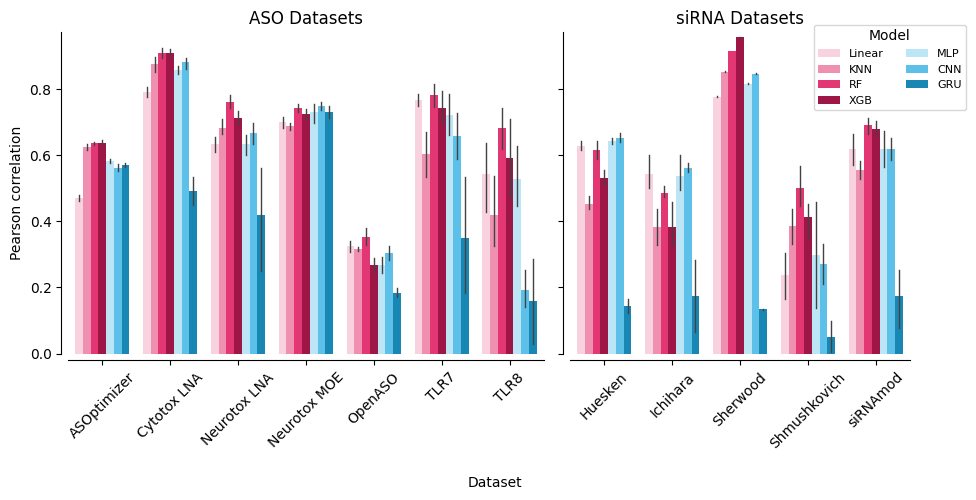

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), width_ratios=[1.4, 1], sharey=True)
sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(ASO_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[0],
    errwidth=1
)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel("")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('Pearson correlation')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(SIRNA_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[1],
    errwidth=1
)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel("")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('Pearson correlation')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title="Model", fontsize=8, ncol=2)
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0.7, 1.04), title="Model", ncols=2, fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.supxlabel("Dataset", fontsize=10)
fig.tight_layout()
fig.savefig("figures/benchmarking_random_pcc.pdf", dpi=300)

In [7]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_pearson_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_pearson_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'random']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_pearson_correlation', 'featurizer_args', 'model_args']]
)

summary_table = (
    data_plot
    .groupby(['dataset', 'model'])
    .agg(
        mean_performance=('test_pearson_correlation', 'mean'),
        std_performance=('test_pearson_correlation', 'std')
    )
    .reset_index()
)

summary_table
summary_table['performance'] = summary_table['mean_performance'].round(2).map('{:.2f}'.format).astype(str) + " ± " + summary_table['std_performance'].round(2).map('{:.2f}'.format).astype(str)
summary_table = summary_table.pivot_table(
    index='dataset', 
    columns='model', 
    values='performance',
    aggfunc='first'
)
summary_table = summary_table[['Linear', 'KNN', 'RF', 'XGB', 'MLP', 'CNN', 'GRU']]
summary_table = summary_table.reindex(ASO_DATA + SIRNA_DATA)


In [8]:
styled_summary_table = summary_table.style.highlight_max(axis=1, subset=summary_table.columns, props='font-weight: bold;')
styled_summary_table

model,Linear,KNN,RF,XGB,MLP,CNN,GRU
dataset,,,,,,,
OpenASO,0.33 ± 0.02,0.32 ± 0.01,0.35 ± 0.04,0.27 ± 0.02,0.27 ± 0.03,0.30 ± 0.03,0.18 ± 0.02
ASOptimizer,0.47 ± 0.01,0.63 ± 0.01,0.64 ± 0.01,0.64 ± 0.01,0.58 ± 0.01,0.56 ± 0.02,0.57 ± 0.01
TLR7,0.77 ± 0.02,0.60 ± 0.09,0.78 ± 0.04,0.74 ± 0.07,0.72 ± 0.08,0.66 ± 0.09,0.35 ± 0.22
TLR8,0.54 ± 0.13,0.42 ± 0.14,0.68 ± 0.08,0.59 ± 0.14,0.53 ± 0.12,0.19 ± 0.07,0.16 ± 0.16
Cytotox LNA,0.79 ± 0.02,0.88 ± 0.03,0.91 ± 0.02,0.91 ± 0.01,0.86 ± 0.01,0.88 ± 0.02,0.49 ± 0.05
Neurotox LNA,0.64 ± 0.03,0.68 ± 0.03,0.76 ± 0.02,0.71 ± 0.03,0.63 ± 0.03,0.67 ± 0.04,0.42 ± 0.21
Neurotox MOE,0.70 ± 0.02,0.69 ± 0.01,0.74 ± 0.02,0.73 ± 0.02,0.73 ± 0.04,0.75 ± 0.02,0.73 ± 0.02
siRNAmod,0.62 ± 0.06,0.56 ± 0.04,0.69 ± 0.03,0.68 ± 0.03,0.62 ± 0.07,0.62 ± 0.04,0.17 ± 0.11
Sherwood,0.78 ± 0.00,0.85 ± 0.00,0.92 ± 0.00,0.96 ± 0.00,0.82 ± 0.00,0.85 ± 0.00,0.13 ± 0.00


In [9]:
import pandas as pd
import numpy as np
import re

def process_and_print_latex(latex_table_string):
    """
    Processes a LaTeX table string, replaces \\font-weightbold with \\textbf{}
    encapsulating the numerical value (mean ± std) within a cell, and prints
    the modified LaTeX table.

    Args:
        latex_table_string (str): A string containing the LaTeX table.
    """
    # 1. Replace  \font-weightbold with \textbf{...}
    def replace_font_weightbold(match):
        """
        Callback function for re.sub to replace  \font-weightbold and encapsulate
        only the numerical value (mean ± std) with  \textbf{}.
        """
        content = match.group(1).strip()  # Get the content after  \font-weightbold and remove extra spaces
        return "\\textbf{" + content + "}" # Encapsulate

    # Use regular expression to find  \font-weightbold followed by cell content
    pattern = r"\\font-weightbold\s*([^\\]+?)(?=\s*&|\\)"   # Capture non-backslash before &
    modified_latex_table_string = re.sub(pattern, replace_font_weightbold, latex_table_string)

    # Print the modified LaTeX table string
    print(modified_latex_table_string)

In [10]:
process_and_print_latex(styled_summary_table.to_latex(column_format='l' + 'c' * len(summary_table.columns), label='tab:summary_table', caption='Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.'))

\begin{table}
\caption{Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.}
\label{tab:summary_table}
\begin{tabular}{lccccccc}
model & Linear & KNN & RF & XGB & MLP & CNN & GRU \\
dataset &  &  &  &  &  &  &  \\
OpenASO & 0.33 ± 0.02 & 0.32 ± 0.01 & \textbf{0.35 ± 0.04} & 0.27 ± 0.02 & 0.27 ± 0.03 & 0.30 ± 0.03 & 0.18 ± 0.02 \\
ASOptimizer & 0.47 ± 0.01 & 0.63 ± 0.01 & \textbf{0.64 ± 0.01} & \textbf{0.64 ± 0.01} & 0.58 ± 0.01 & 0.56 ± 0.02 & 0.57 ± 0.01 \\
TLR7 & 0.77 ± 0.02 & 0.60 ± 0.09 & \textbf{0.78 ± 0.04} & 0.74 ± 0.07 & 0.72 ± 0.08 & 0.66 ± 0.09 & 0.35 ± 0.22 \\
TLR8 & 0.54 ± 0.13 & 0.42 ± 0.14 & \textbf{0.68 ± 0.08} & 0.59 ± 0.14 & 0.53 ± 0.12 & 0.19 ± 0.07 & 0.16 ± 0.16 \\
Cytotox LNA & 0.79 ± 0.02 & 0.88 ± 0.03 & \textbf{0.91 ± 0.02} & 0.91 ± 0.01 & 0.86 ± 0.01 & 0.88 ± 0.02 & 0.49 ± 0.05 \\
Neurotox LNA & 0.64 ± 0.03 & 0.68 ± 0.03 & \textbf{0.76 ± 0.02} & 0.71 ± 0.03 & 0.63 ± 0.03

# Model benchmark random / SCC
Model performance (SCC) on random CV splits for ASO datasets. The best performing configuration (featurizer, featurizer parameters, and model parameters) for each model is taken.


In [11]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_spearman_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_spearman_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'random']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_spearman_correlation', 'featurizer_args', 'model_args']]
)

/tmp/ipykernel_666791/316923486.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/316923486.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/316923486.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/316923486.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


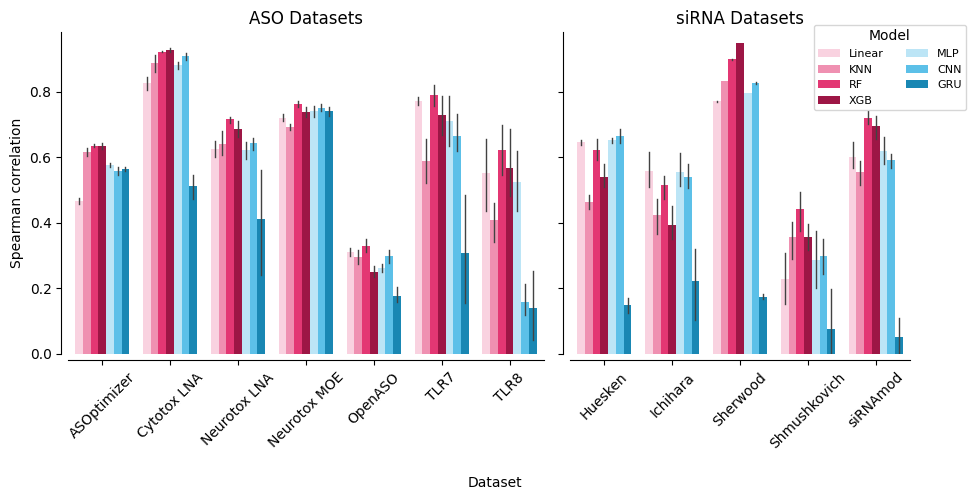

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), width_ratios=[1.4, 1], sharey=True)
sns.barplot(
    x='dataset', 
    y='test_spearman_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(ASO_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[0],
    errwidth=1
)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel("")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('Spearman correlation')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='test_spearman_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(SIRNA_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[1],
    errwidth=1
)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel("")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('Spearman correlation')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title="Model", fontsize=8, ncol=2)
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0.7, 1.04), title="Model", ncols=2, fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.supxlabel("Dataset", fontsize=10)
fig.tight_layout()
fig.savefig("figures/benchmarking_random_scc.pdf", dpi=300)

In [13]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_spearman_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_spearman_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'random']  
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_spearman_correlation', 'featurizer_args', 'model_args']]
)

summary_table = (
    data_plot
    .groupby(['dataset', 'model'])
    .agg(
        mean_performance=('test_spearman_correlation', 'mean'),
        std_performance=('test_spearman_correlation', 'std')
    )
    .reset_index()
)

summary_table
summary_table['performance'] = summary_table['mean_performance'].round(2).map('{:.2f}'.format).astype(str) + " ± " + summary_table['std_performance'].round(2).map('{:.2f}'.format).astype(str)
summary_table = summary_table.pivot_table(
    index='dataset', 
    columns='model', 
    values='performance',
    aggfunc='first'
)
summary_table = summary_table[['Linear', 'KNN', 'RF', 'XGB', 'MLP', 'CNN', 'GRU']]
summary_table = summary_table.reindex(ASO_DATA + SIRNA_DATA)


In [14]:
styled_summary_table = summary_table.style.highlight_max(axis=1, subset=summary_table.columns, props='font-weight: bold')
styled_summary_table

model,Linear,KNN,RF,XGB,MLP,CNN,GRU
dataset,,,,,,,
OpenASO,0.31 ± 0.03,0.29 ± 0.01,0.32 ± 0.03,0.24 ± 0.05,0.25 ± 0.02,0.28 ± 0.04,0.15 ± 0.04
ASOptimizer,0.47 ± 0.01,0.61 ± 0.00,0.63 ± 0.01,0.61 ± 0.01,0.53 ± 0.02,0.54 ± 0.01,0.56 ± 0.01
TLR7,0.77 ± 0.02,0.55 ± 0.08,0.79 ± 0.04,0.70 ± 0.12,0.69 ± 0.07,0.67 ± 0.08,0.31 ± 0.22
TLR8,0.55 ± 0.14,0.32 ± 0.07,0.57 ± 0.13,0.57 ± 0.13,0.52 ± 0.12,0.16 ± 0.06,0.14 ± 0.14
Cytotox LNA,0.75 ± 0.02,0.81 ± 0.02,0.92 ± 0.01,0.92 ± 0.01,0.88 ± 0.01,0.90 ± 0.02,0.49 ± 0.09
Neurotox LNA,0.62 ± 0.03,0.63 ± 0.03,0.71 ± 0.04,0.68 ± 0.04,0.60 ± 0.04,0.61 ± 0.03,0.26 ± 0.29
Neurotox MOE,0.72 ± 0.01,0.69 ± 0.01,0.73 ± 0.03,0.74 ± 0.02,0.73 ± 0.02,0.72 ± 0.03,0.74 ± 0.02
siRNAmod,0.60 ± 0.05,0.55 ± 0.05,0.72 ± 0.06,0.66 ± 0.04,0.58 ± 0.03,0.56 ± 0.05,0.05 ± 0.08
Sherwood,0.77 ± 0.00,0.83 ± 0.00,0.90 ± 0.00,0.95 ± 0.00,0.80 ± 0.00,0.82 ± 0.00,0.17 ± 0.01


In [15]:
process_and_print_latex(styled_summary_table.to_latex(column_format='l' + 'c' * len(summary_table.columns), label='tab:summary_table', caption='Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.'))

\begin{table}
\caption{Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.}
\label{tab:summary_table}
\begin{tabular}{lccccccc}
model & Linear & KNN & RF & XGB & MLP & CNN & GRU \\
dataset &  &  &  &  &  &  &  \\
OpenASO & 0.31 ± 0.03 & 0.29 ± 0.01 & \textbf{0.32 ± 0.03} & 0.24 ± 0.05 & 0.25 ± 0.02 & 0.28 ± 0.04 & 0.15 ± 0.04 \\
ASOptimizer & 0.47 ± 0.01 & 0.61 ± 0.00 & \textbf{0.63 ± 0.01} & 0.61 ± 0.01 & 0.53 ± 0.02 & 0.54 ± 0.01 & 0.56 ± 0.01 \\
TLR7 & 0.77 ± 0.02 & 0.55 ± 0.08 & \textbf{0.79 ± 0.04} & 0.70 ± 0.12 & 0.69 ± 0.07 & 0.67 ± 0.08 & 0.31 ± 0.22 \\
TLR8 & 0.55 ± 0.14 & 0.32 ± 0.07 & \textbf{0.57 ± 0.13} & \textbf{0.57 ± 0.13} & 0.52 ± 0.12 & 0.16 ± 0.06 & 0.14 ± 0.14 \\
Cytotox LNA & 0.75 ± 0.02 & 0.81 ± 0.02 & \textbf{0.92 ± 0.01} & \textbf{0.92 ± 0.01} & 0.88 ± 0.01 & 0.90 ± 0.02 & 0.49 ± 0.09 \\
Neurotox LNA & 0.62 ± 0.03 & 0.63 ± 0.03 & \textbf{0.71 ± 0.04} & 0.68 ± 0.04 & 0.

# Model benchmark nucleobase / PCC
Model performance (PCC) on nucleobase CV splits for ASO datasets. The best performing configuration (featurizer, featurizer parameters, and model parameters) for each model is taken.


In [16]:
data_plot = data.loc[data['cross_validation'] == 'nucleobase']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_pearson_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_pearson_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'nucleobase']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_pearson_correlation', 'featurizer_args', 'model_args']]
)

/tmp/ipykernel_666791/4041388408.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/4041388408.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/4041388408.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/4041388408.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


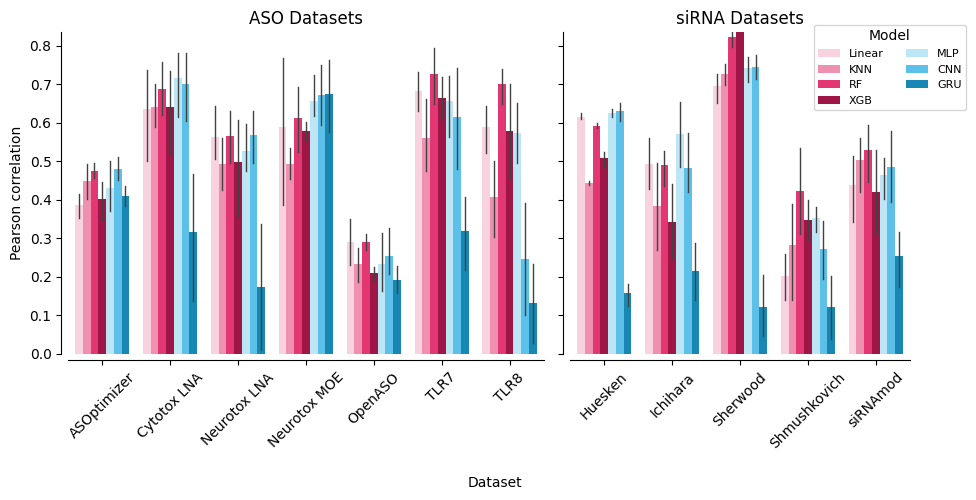

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), width_ratios=[1.4, 1], sharey=True)
sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(ASO_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[0],
    errwidth=1
)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel("")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('Pearson correlation')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(SIRNA_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[1],
    errwidth=1
)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel("")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('Pearson correlation')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title="Model", fontsize=8, ncol=2)
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0.7, 1.04), title="Model", ncols=2, fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.supxlabel("Dataset", fontsize=10)
fig.tight_layout()
fig.savefig("figures/benchmarking_nucleobase_pcc.pdf", dpi=300)

In [18]:
data_plot = data.loc[data['cross_validation'] == 'nucleobase'].copy()
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_pearson_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_pearson_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'nucleobase']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_pearson_correlation', 'featurizer_args', 'model_args']]
)

summary_table = (
    data_plot
    .groupby(['dataset', 'model'])
    .agg(
        mean_performance=('test_pearson_correlation', 'mean'),
        std_performance=('test_pearson_correlation', 'std')
    )
    .reset_index()
)

summary_table
summary_table['performance'] = summary_table['mean_performance'].round(2).map('{:.2f}'.format).astype(str) + " ± " + summary_table['std_performance'].round(2).map('{:.2f}'.format).astype(str)
summary_table = summary_table.pivot_table(
    index='dataset', 
    columns='model', 
    values='performance',
    aggfunc='first'
)
summary_table = summary_table[['Linear', 'KNN', 'RF', 'XGB', 'MLP', 'CNN', 'GRU']]
summary_table = summary_table.reindex(ASO_DATA + SIRNA_DATA)

In [19]:
styled_summary_table = summary_table.style.highlight_max(axis=1, subset=summary_table.columns, props='font-weight: bold')
styled_summary_table

model,Linear,KNN,RF,XGB,MLP,CNN,GRU
dataset,,,,,,,
OpenASO,0.29 ± 0.08,0.23 ± 0.06,0.29 ± 0.03,0.21 ± 0.02,0.23 ± 0.09,0.25 ± 0.08,0.19 ± 0.05
ASOptimizer,0.39 ± 0.04,0.45 ± 0.06,0.48 ± 0.03,0.40 ± 0.06,0.43 ± 0.08,0.48 ± 0.04,0.41 ± 0.03
TLR7,0.68 ± 0.07,0.56 ± 0.13,0.73 ± 0.10,0.66 ± 0.07,0.66 ± 0.11,0.62 ± 0.17,0.32 ± 0.13
TLR8,0.59 ± 0.08,0.41 ± 0.13,0.70 ± 0.06,0.58 ± 0.16,0.57 ± 0.10,0.25 ± 0.19,0.13 ± 0.13
Cytotox LNA,0.64 ± 0.16,0.64 ± 0.07,0.69 ± 0.09,0.64 ± 0.15,0.72 ± 0.11,0.70 ± 0.11,0.32 ± 0.23
Neurotox LNA,0.56 ± 0.09,0.49 ± 0.09,0.56 ± 0.08,0.50 ± 0.16,0.53 ± 0.08,0.57 ± 0.08,0.17 ± 0.22
Neurotox MOE,0.59 ± 0.24,0.49 ± 0.05,0.61 ± 0.11,0.58 ± 0.04,0.66 ± 0.07,0.67 ± 0.10,0.67 ± 0.12
siRNAmod,0.44 ± 0.11,0.50 ± 0.09,0.53 ± 0.09,0.42 ± 0.14,0.47 ± 0.07,0.49 ± 0.12,0.25 ± 0.09
Sherwood,0.70 ± 0.05,0.73 ± 0.03,0.82 ± 0.03,0.90 ± 0.03,0.74 ± 0.04,0.74 ± 0.04,0.12 ± 0.10


In [20]:
process_and_print_latex(styled_summary_table.to_latex(column_format='l' + 'c' * len(summary_table.columns), label='tab:summary_table', caption='Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.'))

\begin{table}
\caption{Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.}
\label{tab:summary_table}
\begin{tabular}{lccccccc}
model & Linear & KNN & RF & XGB & MLP & CNN & GRU \\
dataset &  &  &  &  &  &  &  \\
OpenASO & \textbf{0.29 ± 0.08} & 0.23 ± 0.06 & 0.29 ± 0.03 & 0.21 ± 0.02 & 0.23 ± 0.09 & 0.25 ± 0.08 & 0.19 ± 0.05 \\
ASOptimizer & 0.39 ± 0.04 & 0.45 ± 0.06 & 0.48 ± 0.03 & 0.40 ± 0.06 & 0.43 ± 0.08 & \textbf{0.48 ± 0.04} & 0.41 ± 0.03 \\
TLR7 & 0.68 ± 0.07 & 0.56 ± 0.13 & \textbf{0.73 ± 0.10} & 0.66 ± 0.07 & 0.66 ± 0.11 & 0.62 ± 0.17 & 0.32 ± 0.13 \\
TLR8 & 0.59 ± 0.08 & 0.41 ± 0.13 & \textbf{0.70 ± 0.06} & 0.58 ± 0.16 & 0.57 ± 0.10 & 0.25 ± 0.19 & 0.13 ± 0.13 \\
Cytotox LNA & 0.64 ± 0.16 & 0.64 ± 0.07 & 0.69 ± 0.09 & 0.64 ± 0.15 & \textbf{0.72 ± 0.11} & 0.70 ± 0.11 & 0.32 ± 0.23 \\
Neurotox LNA & 0.56 ± 0.09 & 0.49 ± 0.09 & 0.56 ± 0.08 & 0.50 ± 0.16 & 0.53 ± 0.08 & \textbf{0.57 ± 

# Model benchmark nucleobase / SCC
Model performance (SCC) on random CV splits for ASO datasets. The best performing configuration (featurizer, featurizer parameters, and model parameters) for each model is taken.


In [21]:
data_plot = data.loc[data['cross_validation'] == 'nucleobase']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_spearman_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_spearman_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'nucleobase']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_spearman_correlation', 'featurizer_args', 'model_args']]
)

/tmp/ipykernel_666791/1039091969.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/1039091969.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/1039091969.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/1039091969.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


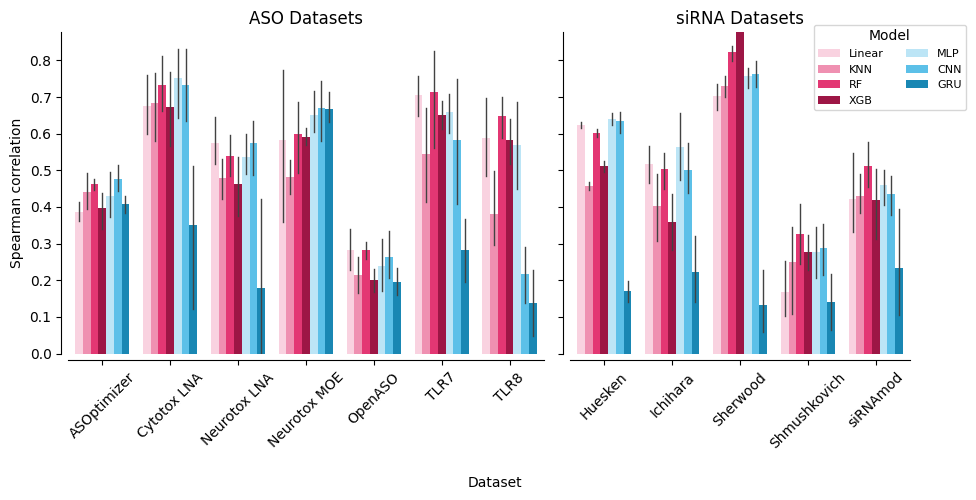

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), width_ratios=[1.4, 1], sharey=True)
sns.barplot(
    x='dataset', 
    y='test_spearman_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(ASO_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[0],
    errwidth=1
)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel("")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('Spearman correlation')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='test_spearman_correlation',
    hue='model',
    data=data_plot[data_plot['dataset'].isin(SIRNA_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[1],
    errwidth=1
)
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel("")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('Spearman correlation')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title="Model", fontsize=8, ncol=2)
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0.7, 1.04), title="Model", ncols=2, fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.supxlabel("Dataset", fontsize=10)
fig.tight_layout()
fig.savefig("figures/benchmarking_nucleobase_scc.pdf", dpi=300)

In [23]:
data_plot = data.loc[data['cross_validation'] == 'nucleobase']
data_plot = data_plot.drop(columns=['cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset_unformatted', 'dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_spearman_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_spearman_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'nucleobase']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_spearman_correlation', 'featurizer_args', 'model_args']]
)

summary_table = (
    data_plot
    .groupby(['dataset', 'model'])
    .agg(
        mean_performance=('test_spearman_correlation', 'mean'),
        std_performance=('test_spearman_correlation', 'std')
    )
    .reset_index()
)

summary_table
summary_table['performance'] = summary_table['mean_performance'].round(2).map('{:.2f}'.format).astype(str) + " ± " + summary_table['std_performance'].round(2).map('{:.2f}'.format).astype(str)
summary_table = summary_table.pivot_table(
    index='dataset', 
    columns='model', 
    values='performance',
    aggfunc='first'
)
summary_table = summary_table[['Linear', 'KNN', 'RF', 'XGB', 'MLP', 'CNN', 'GRU']]
summary_table = summary_table.reindex(ASO_DATA + SIRNA_DATA)
summary_table

model,Linear,KNN,RF,XGB,MLP,CNN,GRU
dataset,,,,,,,
OpenASO,0.28 ± 0.07,0.21 ± 0.06,0.28 ± 0.03,0.20 ± 0.04,0.24 ± 0.09,0.26 ± 0.08,0.19 ± 0.05
ASOptimizer,0.39 ± 0.03,0.44 ± 0.06,0.46 ± 0.02,0.40 ± 0.06,0.43 ± 0.08,0.48 ± 0.04,0.41 ± 0.03
TLR7,0.71 ± 0.07,0.55 ± 0.17,0.71 ± 0.18,0.65 ± 0.05,0.66 ± 0.07,0.58 ± 0.22,0.28 ± 0.12
TLR8,0.59 ± 0.14,0.38 ± 0.14,0.65 ± 0.07,0.58 ± 0.08,0.57 ± 0.16,0.22 ± 0.10,0.14 ± 0.11
Cytotox LNA,0.68 ± 0.10,0.68 ± 0.13,0.73 ± 0.10,0.67 ± 0.14,0.75 ± 0.12,0.73 ± 0.13,0.35 ± 0.26
Neurotox LNA,0.57 ± 0.08,0.48 ± 0.07,0.54 ± 0.07,0.46 ± 0.11,0.54 ± 0.07,0.57 ± 0.10,0.18 ± 0.33
Neurotox MOE,0.58 ± 0.26,0.48 ± 0.06,0.60 ± 0.12,0.59 ± 0.03,0.65 ± 0.07,0.67 ± 0.11,0.67 ± 0.05
siRNAmod,0.42 ± 0.14,0.43 ± 0.06,0.51 ± 0.08,0.42 ± 0.13,0.46 ± 0.06,0.44 ± 0.07,0.23 ± 0.19
Sherwood,0.70 ± 0.05,0.73 ± 0.04,0.82 ± 0.03,0.90 ± 0.02,0.76 ± 0.03,0.76 ± 0.05,0.13 ± 0.11


In [24]:
styled_summary_table = summary_table.style.highlight_max(axis=1, subset=summary_table.columns, props='font-weight: bold')
styled_summary_table

model,Linear,KNN,RF,XGB,MLP,CNN,GRU
dataset,,,,,,,
OpenASO,0.28 ± 0.07,0.21 ± 0.06,0.28 ± 0.03,0.20 ± 0.04,0.24 ± 0.09,0.26 ± 0.08,0.19 ± 0.05
ASOptimizer,0.39 ± 0.03,0.44 ± 0.06,0.46 ± 0.02,0.40 ± 0.06,0.43 ± 0.08,0.48 ± 0.04,0.41 ± 0.03
TLR7,0.71 ± 0.07,0.55 ± 0.17,0.71 ± 0.18,0.65 ± 0.05,0.66 ± 0.07,0.58 ± 0.22,0.28 ± 0.12
TLR8,0.59 ± 0.14,0.38 ± 0.14,0.65 ± 0.07,0.58 ± 0.08,0.57 ± 0.16,0.22 ± 0.10,0.14 ± 0.11
Cytotox LNA,0.68 ± 0.10,0.68 ± 0.13,0.73 ± 0.10,0.67 ± 0.14,0.75 ± 0.12,0.73 ± 0.13,0.35 ± 0.26
Neurotox LNA,0.57 ± 0.08,0.48 ± 0.07,0.54 ± 0.07,0.46 ± 0.11,0.54 ± 0.07,0.57 ± 0.10,0.18 ± 0.33
Neurotox MOE,0.58 ± 0.26,0.48 ± 0.06,0.60 ± 0.12,0.59 ± 0.03,0.65 ± 0.07,0.67 ± 0.11,0.67 ± 0.05
siRNAmod,0.42 ± 0.14,0.43 ± 0.06,0.51 ± 0.08,0.42 ± 0.13,0.46 ± 0.06,0.44 ± 0.07,0.23 ± 0.19
Sherwood,0.70 ± 0.05,0.73 ± 0.04,0.82 ± 0.03,0.90 ± 0.02,0.76 ± 0.03,0.76 ± 0.05,0.13 ± 0.11


In [25]:
process_and_print_latex(styled_summary_table.to_latex(column_format='l' + 'c' * len(summary_table.columns), label='tab:summary_table', caption='Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.'))

\begin{table}
\caption{Summary of model performance on ASO and siRNA datasets. Each cell contains the mean and standard deviation of the Pearson correlation coefficient.}
\label{tab:summary_table}
\begin{tabular}{lccccccc}
model & Linear & KNN & RF & XGB & MLP & CNN & GRU \\
dataset &  &  &  &  &  &  &  \\
OpenASO & \textbf{0.28 ± 0.07} & 0.21 ± 0.06 & 0.28 ± 0.03 & 0.20 ± 0.04 & 0.24 ± 0.09 & 0.26 ± 0.08 & 0.19 ± 0.05 \\
ASOptimizer & 0.39 ± 0.03 & 0.44 ± 0.06 & 0.46 ± 0.02 & 0.40 ± 0.06 & 0.43 ± 0.08 & \textbf{0.48 ± 0.04} & 0.41 ± 0.03 \\
TLR7 & 0.71 ± 0.07 & 0.55 ± 0.17 & \textbf{0.71 ± 0.18} & 0.65 ± 0.05 & 0.66 ± 0.07 & 0.58 ± 0.22 & 0.28 ± 0.12 \\
TLR8 & 0.59 ± 0.14 & 0.38 ± 0.14 & \textbf{0.65 ± 0.07} & 0.58 ± 0.08 & 0.57 ± 0.16 & 0.22 ± 0.10 & 0.14 ± 0.11 \\
Cytotox LNA & 0.68 ± 0.10 & 0.68 ± 0.13 & 0.73 ± 0.10 & 0.67 ± 0.14 & \textbf{0.75 ± 0.12} & 0.73 ± 0.13 & 0.35 ± 0.26 \\
Neurotox LNA & 0.57 ± 0.08 & 0.48 ± 0.07 & 0.54 ± 0.07 & 0.46 ± 0.11 & 0.54 ± 0.07 & \textbf{0.57 ± 

# CV and nucleobase split relationship
Relationship between performance as measured with a CV and a nucleobase split.

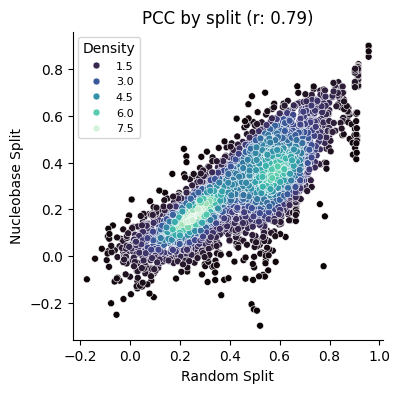

In [26]:
from scipy.stats import gaussian_kde

d = data.pivot_table(
    index=['dataset', 'featurizer', 'model', 'model_args', 'featurizer_args'],
    columns='cross_validation',
    values='test_pearson_correlation'
).dropna()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
xy = d[['random', 'nucleobase']].dropna().values.T
density = gaussian_kde(xy)(xy)

sns.scatterplot(
    data=d.reset_index(),
    x='random',
    y='nucleobase',
    hue=density,
    palette='mako',
    s=25,
    ax=ax,
    rasterized=True,
)
correlation = d[['random', 'nucleobase']].corr().iloc[0, 1]
ax.legend(title='Density', fontsize=8)
ax.set_title(f"PCC by split (r: {correlation:.2f})")
ax.set_xlabel("Random Split")
ax.set_ylabel("Nucleobase Split")
sns.despine()
fig.savefig("figures/pearson_correlation_splits.pdf", dpi=200, bbox_inches='tight')

# Best parameters table
Model parameters for the best performing models for each dataset. The best performing configuration (featurizer, featurizer parameters, and model parameters) for each model is taken.

In [27]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset_unformatted', 'dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_pearson_correlation'].idxmax()]
best_models = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_pearson_correlation', 'featurizer_args', 'model_args']]

data_plot = (
    data
    .loc[data['cross_validation'] == 'random']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'featurizer', 'featurizer_args', 'model_args']]
)

data_plot = data_plot.groupby(['dataset', 'model']).first().reset_index()
featurizer_args_df = data_plot['featurizer_args'].apply(eval).apply(pd.Series)
model_args_df = data_plot['model_args'].apply(eval).apply(pd.Series)
featurizer_args_df = featurizer_args_df.rename(columns=lambda x: f'featurizer_{x}')
model_args_df = model_args_df.rename(columns=lambda x: f'model_{x}')
data_plot = pd.concat([data_plot, featurizer_args_df, model_args_df], axis=1)
data_plot


,dataset,model,featurizer,featurizer_args,model_args,featurizer_encode_components,featurizer_k,featurizer_modification_abundance,model_depth,model_hidden_dim,model_kernel_size,model_pooling_operation,model_num_layers,model_n_neighbors,model_type,model_dropout,model_hidden_dims,model_max_depth,model_n_estimators
0,ASOptimizer,CNN,OneHotEncoder,"{'encode_components': ['base', 'sugar', 'phosp...","{'depth': 2, 'hidden_dim': 64, 'kernel_size': ...","[base, sugar, phosphate]",NaN,NaN,2.0,64.0,5.0,avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASOptimizer,GRU,OneHotEncoder,"{'encode_components': ['base', 'sugar', 'phosp...","{'hidden_dim': 64, 'num_layers': 2}","[base, sugar, phosphate]",NaN,NaN,NaN,64.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ASOptimizer,KNN,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}",{'n_neighbors': 10},NaN,"[1, 2, 3]",True,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
3,ASOptimizer,Linear,OneHotEncoder,"{'encode_components': ['base', 'sugar', 'phosp...",{'type': 'ridge'},"[base, sugar, phosphate]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ridge,NaN,NaN,NaN,NaN
4,ASOptimizer,MLP,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}","{'dropout': 0, 'hidden_dims': [128, 128]}",NaN,"[1, 2, 3]",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[128, 128]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,siRNAmod,KNN,KMersCounts,"{'k': [1, 2, 3], 'modification_abundance': True}",{'n_neighbors': 10},NaN,"[1, 2, 3]",True,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
80,siRNAmod,Linear,OneHotEncoder,"{'encode_components': ['base', 'sugar', 'phosp...",{'type': 'ridge'},"[base, sugar, phosphate]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ridge,NaN,NaN,NaN,NaN
81,siRNAmod,MLP,OneHotEncoder,"{'encode_components': ['base', 'sugar', 'phosp...","{'dropout': 0, 'hidden_dims': [128]}","[base, sugar, phosphate]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[128],NaN,NaN
82,siRNAmod,RF,OneHotEncoder,"{'encode_components': ['base', 'sugar', 'phosp...","{'max_depth': 10, 'n_estimators': 500}","[base, sugar, phosphate]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,500.0


In [28]:
def config_as_str(row):
    featurizer_config = ast.literal_eval(row['featurizer_args'])
    model_config = ast.literal_eval(row['model_args'])
    featurizer = row['featurizer']
    model = row['model']

    if featurizer == "OneHotEncoder":
        if featurizer_config['encode_components'] == "['base']":
            feat_string = "OHE (reduced)"
        else:
            feat_string = "OHE (full)"

    elif featurizer == "KMersCounts":
        feat_string = f"KMers (k={featurizer_config['k']}, mod={featurizer_config['modification_abundance']})"

    if model == "Linear":
        model_string = f"Linear{' (ridge)' if model_config['type'] == 'ridge' else ''})"
    elif model == "XGB":
        model_string = f"XGB (D={model_config['max_depth']}, N={model_config['n_estimators']})"
    elif model == "RF":
        model_string = f"RF (D={model_config['max_depth']}, N={model_config['n_estimators']})"
    elif model == "KNN":
        model_string = f"KNN (K={model_config['n_neighbors']})"
    elif model == "MLP":
        model_string = f"MLP (H={model_config['hidden_dims']}, D={model_config['dropout']})"
    elif model == "GRU":
        model_string = f"GRU (H={model_config['hidden_dim']}, N={model_config['num_layers']})"
    elif model == "CNN":
        model_string = f"CNN (H={model_config['hidden_dim']}, K={model_config['kernel_size']})"

    return f"{feat_string}, {model_string}"

data_plot['config'] = data_plot.apply(config_as_str, axis=1)
data_plot = data_plot.pivot_table(
    index='dataset', 
    columns='model', 
    values='config',
    aggfunc='first'
)

data_plot = data_plot[['Linear', 'KNN', 'RF', 'XGB', 'MLP', 'CNN', 'GRU']]
data_plot = data_plot.reindex(ASO_DATA + SIRNA_DATA)
data_plot

model,Linear,KNN,RF,XGB,MLP,CNN,GRU
dataset,,,,,,,
OpenASO,"KMers (k=[1, 2], mod=False), Linear)","KMers (k=[1, 2, 3], mod=True), KNN (K=10)","KMers (k=[1, 2, 3], mod=True), RF (D=10, N=500)","KMers (k=[1, 2], mod=False), XGB (D=10, N=1000)","OHE (full), MLP (H=[128], D=0)","OHE (full), CNN (H=32, K=5)","OHE (full), GRU (H=64, N=1)"
ASOptimizer,"OHE (full), Linear (ridge))","KMers (k=[1, 2, 3], mod=True), KNN (K=10)","KMers (k=[1, 2, 3], mod=True), RF (D=20, N=500)","KMers (k=[1, 2, 3], mod=True), XGB (D=10, N=100)","KMers (k=[1, 2, 3], mod=True), MLP (H=[128, 12...","OHE (full), CNN (H=64, K=5)","OHE (full), GRU (H=64, N=2)"
TLR7,"OHE (full), Linear (ridge))","KMers (k=[1], mod=True), KNN (K=10)","OHE (full), RF (D=20, N=500)","OHE (full), XGB (D=10, N=100)","OHE (full), MLP (H=[64, 64], D=0)","OHE (full), CNN (H=64, K=7)","OHE (full), GRU (H=64, N=2)"
TLR8,"KMers (k=[1, 2], mod=True), Linear)","OHE (full), KNN (K=15)","OHE (full), RF (D=20, N=500)","OHE (full), XGB (D=10, N=1000)","OHE (full), MLP (H=[64], D=0)","OHE (full), CNN (H=64, K=3)","OHE (full), GRU (H=32, N=2)"
Cytotox LNA,"OHE (full), Linear (ridge))","OHE (full), KNN (K=5)","OHE (full), RF (D=10, N=500)","OHE (full), XGB (D=10, N=100)","OHE (full), MLP (H=[64], D=0)","OHE (full), CNN (H=64, K=5)","OHE (full), GRU (H=32, N=2)"
Neurotox LNA,"KMers (k=[1, 2, 3], mod=True), Linear)","KMers (k=[1, 2, 3], mod=True), KNN (K=5)","KMers (k=[1, 2, 3], mod=True), RF (D=20, N=500)","KMers (k=[1, 2, 3], mod=True), XGB (D=20, N=500)","OHE (full), MLP (H=[128], D=0)","OHE (full), CNN (H=64, K=5)","OHE (full), GRU (H=64, N=2)"
Neurotox MOE,"OHE (full), Linear (ridge))","KMers (k=[1, 2, 3], mod=True), KNN (K=10)","OHE (full), RF (D=30, N=500)","OHE (full), XGB (D=10, N=500)","OHE (full), MLP (H=[128, 128], D=0)","OHE (full), CNN (H=64, K=5)","OHE (full), GRU (H=64, N=1)"
siRNAmod,"OHE (full), Linear (ridge))","KMers (k=[1, 2, 3], mod=True), KNN (K=10)","OHE (full), RF (D=10, N=500)","OHE (full), XGB (D=10, N=1000)","OHE (full), MLP (H=[128], D=0)","OHE (full), CNN (H=64, K=7)","OHE (full), GRU (H=64, N=2)"
Sherwood,"OHE (full), Linear (ridge))","OHE (full), KNN (K=15)","OHE (full), RF (D=10, N=500)","OHE (full), XGB (D=10, N=500)","OHE (full), MLP (H=[64], D=0)","OHE (full), CNN (H=64, K=7)","OHE (full), GRU (H=32, N=1)"


In [29]:
print(data_plot.to_latex(escape=False, column_format='l' + 'c' * len(data_plot.columns), label='tab:config_table', caption='Summary of model configurations on ASO and siRNA datasets.'))


\begin{table}
\caption{Summary of model configurations on ASO and siRNA datasets.}
\label{tab:config_table}
\begin{tabular}{lccccccc}
\toprule
model & Linear & KNN & RF & XGB & MLP & CNN & GRU \\
dataset &  &  &  &  &  &  &  \\
\midrule
OpenASO & KMers (k=[1, 2], mod=False), Linear) & KMers (k=[1, 2, 3], mod=True), KNN (K=10) & KMers (k=[1, 2, 3], mod=True), RF (D=10, N=500) & KMers (k=[1, 2], mod=False), XGB (D=10, N=1000) & OHE (full), MLP (H=[128], D=0) & OHE (full), CNN (H=32, K=5) & OHE (full), GRU (H=64, N=1) \\
ASOptimizer & OHE (full), Linear (ridge)) & KMers (k=[1, 2, 3], mod=True), KNN (K=10) & KMers (k=[1, 2, 3], mod=True), RF (D=20, N=500) & KMers (k=[1, 2, 3], mod=True), XGB (D=10, N=100) & KMers (k=[1, 2, 3], mod=True), MLP (H=[128, 128], D=0) & OHE (full), CNN (H=64, K=5) & OHE (full), GRU (H=64, N=2) \\
TLR7 & OHE (full), Linear (ridge)) & KMers (k=[1], mod=True), KNN (K=10) & OHE (full), RF (D=20, N=500) & OHE (full), XGB (D=10, N=100) & OHE (full), MLP (H=[64, 64], D=

# OHE encoding performance, full vs reduced

/tmp/ipykernel_666791/3314831469.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(
/tmp/ipykernel_666791/3314831469.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/3314831469.py:22: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(
/tmp/ipykernel_666791/3314831469.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


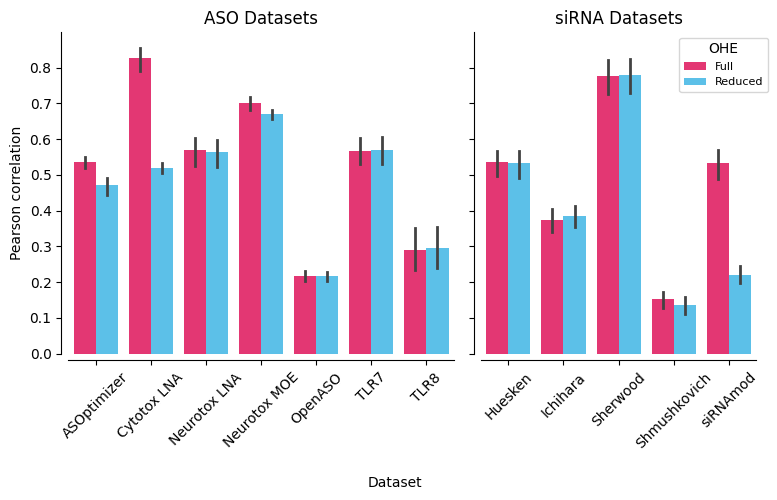

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), width_ratios=[1.4, 1], sharey=True)
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean().reset_index()
palette = ['#ff1b6b', '#45caff']
sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='featurizer_args',
    data=data_plot[(data_plot['dataset'].isin(ASO_DATA)) & (data_plot['featurizer'] == 'OneHotEncoder')], 
    palette=palette,
    ax=ax[0],
    errwidth=2
)
ax[0].set_xlabel("")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('Pearson correlation')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='featurizer_args',
    data=data_plot[(data_plot['dataset'].isin(SIRNA_DATA)) & (data_plot['featurizer'] == 'OneHotEncoder')], 
    palette=palette,
    ax=ax[1],
    errwidth=2
)
ax[1].set_xlabel("")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('Pearson correlation')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, ['Full', 'Reduced'], title='Featurizer args', fontsize=8)
sns.despine()
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0.7, 1), title="OHE", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.supxlabel("Dataset", fontsize=10)
fig.tight_layout()
fig.savefig("figures/ohe_comparison.pdf", bbox_inches='tight')

In [31]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean().reset_index()
data_plot = data_plot[data_plot['featurizer'] == 'OneHotEncoder']

summary_table = (
    data_plot
    .groupby(['dataset', 'model', 'featurizer_args'])
    .agg(
        mean_performance=('test_pearson_correlation', 'mean'),
        std_performance=('test_pearson_correlation', 'std')
    )
    .reset_index()
)

summary_table['encoding'] = summary_table['featurizer_args'].apply(lambda x: 'Reduced' if "['base']" in x else 'Full')
summary_table['performance'] = summary_table['mean_performance'].round(2).astype(str) + " ± " + summary_table['std_performance'].round(2).astype(str)
summary_table = summary_table.pivot_table(
    index='dataset', 
    columns=['model', 'encoding'], 
    values='performance',
    aggfunc='first'
)
summary_table = summary_table[['Linear', 'KNN', 'RF', 'XGB', 'MLP', 'CNN', 'GRU']]
summary_table = summary_table.reindex(ASO_DATA + SIRNA_DATA)
summary_table

model              Linear                       KNN                        RF  \
encoding             Full      Reduced         Full      Reduced         Full   
dataset                                                                         
OpenASO        0.2 ± 0.09  0.23 ± 0.03  0.18 ± 0.03  0.14 ± 0.02  0.25 ± 0.02   
ASOptimizer   0.28 ± 0.27  0.28 ± 0.09   0.53 ± 0.0  0.44 ± 0.02   0.57 ± 0.0   
TLR7          0.74 ± 0.04  0.71 ± 0.01  0.52 ± 0.07  0.51 ± 0.08  0.71 ± 0.01   
TLR8          0.46 ± 0.04  0.48 ± 0.07   0.4 ± 0.02  0.28 ± 0.05  0.59 ± 0.06   
Cytotox LNA   0.79 ± 0.01  0.54 ± 0.01  0.85 ± 0.02  0.55 ± 0.02   0.9 ± 0.01   
Neurotox LNA  0.48 ± 0.21  0.47 ± 0.18  0.62 ± 0.02   0.5 ± 0.02  0.66 ± 0.02   
Neurotox MOE   0.49 ± 0.3  0.58 ± 0.12  0.57 ± 0.01  0.49 ± 0.01  0.73 ± 0.01   
siRNAmod      0.32 ± 0.42  0.19 ± 0.19  0.49 ± 0.01  0.24 ± 0.02  0.67 ± 0.01   
Sherwood       0.78 ± 0.0   0.78 ± 0.0  0.84 ± 0.01  0.85 ± 0.01   0.91 ± 0.0   
Ichihara       0.5 ± 0.07  0.47 ± 0.04  0.32 ± 0.06   0.32 ± 0.1  0.45 ± 0.02   
Huesken       0.61 ± 0.01   0.6 ± 0.02  0.41 ± 0.05  0.41 ± 0.05  0.59 ± 0.01   
Shmushkovich   0.18 ± 0.0  0.16 ± 0.12   0.2 ± 0.04   0.2 ± 0.04  0.26 ± 0.04   

model                              XGB                       MLP               \
encoding          Reduced         Full      Reduced         Full      Reduced   
dataset                                                                         
OpenASO       0.23 ± 0.02  0.14 ± 0.02  0.14 ± 0.03  0.22 ± 0.04  0.23 ± 0.03   
ASOptimizer    0.57 ± 0.0  0.55 ± 0.01  0.54 ± 0.01  0.52 ± 0.02  0.46 ± 0.04   
TLR7          0.72 ± 0.04  0.67 ± 0.05  0.66 ± 0.05  0.61 ± 0.07  0.63 ± 0.06   
TLR8          0.56 ± 0.06  0.52 ± 0.04  0.52 ± 0.07  0.31 ± 0.19  0.37 ± 0.05   
Cytotox LNA   0.54 ± 0.03   0.9 ± 0.01  0.55 ± 0.03  0.83 ± 0.03  0.52 ± 0.03   
Neurotox LNA  0.64 ± 0.02  0.58 ± 0.03  0.57 ± 0.02  0.61 ± 0.02   0.6 ± 0.02   
Neurotox MOE   0.7 ± 0.02  0.69 ± 0.02  0.66 ± 0.01  0.71 ± 0.02  0.68 ± 0.02   
siRNAmod      0.31 ± 0.05  0.64 ± 0.02   0.3 ± 0.02  0.57 ± 0.04  0.22 ± 0.03   
Sherwood       0.91 ± 0.0  0.92 ± 0.02  0.92 ± 0.02  0.76 ± 0.04  0.78 ± 0.03   
Ichihara      0.46 ± 0.02  0.28 ± 0.04   0.3 ± 0.03  0.44 ± 0.06  0.47 ± 0.05   
Huesken       0.59 ± 0.01  0.49 ± 0.03  0.49 ± 0.03  0.59 ± 0.05   0.6 ± 0.05   
Shmushkovich  0.24 ± 0.03  0.16 ± 0.05  0.12 ± 0.06  0.16 ± 0.06  0.19 ± 0.08   

model                 CNN                       GRU               
encoding             Full      Reduced         Full      Reduced  
dataset                                                           
OpenASO       0.26 ± 0.03  0.26 ± 0.03  0.17 ± 0.01  0.17 ± 0.01  
ASOptimizer   0.54 ± 0.01  0.46 ± 0.03  0.55 ± 0.02  0.31 ± 0.16  
TLR7          0.51 ± 0.08    0.5 ± 0.1  0.21 ± 0.11   0.22 ± 0.1  
TLR8          0.07 ± 0.06  0.08 ± 0.05   0.0 ± 0.06  0.05 ± 0.07  
Cytotox LNA   0.84 ± 0.06  0.52 ± 0.04  0.44 ± 0.04  0.37 ± 0.02  
Neurotox LNA  0.61 ± 0.02  0.62 ± 0.04  0.03 ± 0.13   0.13 ± 0.2  
Neurotox MOE  0.73 ± 0.01  0.69 ± 0.02  0.72 ± 0.01  0.67 ± 0.02  
siRNAmod      0.52 ± 0.04  0.18 ± 0.06  0.11 ± 0.08  0.05 ± 0.05  
Sherwood      0.68 ± 0.17  0.68 ± 0.18   0.13 ± nan   0.13 ± nan  
Ichihara      0.42 ± 0.06  0.42 ± 0.05  0.06 ± 0.09  0.09 ± 0.06  
Huesken       0.61 ± 0.03   0.6 ± 0.04  0.11 ± 0.03  0.08 ± 0.08  
Shmushkovich  0.11 ± 0.09  0.09 ± 0.07  0.01 ± 0.03  -0.0 ± 0.07

# KMersCounts, modification abundance
Performance of KMersCounts with and without modification abundance.

/tmp/ipykernel_666791/3187852241.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(
/tmp/ipykernel_666791/3187852241.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/3187852241.py:25: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(
/tmp/ipykernel_666791/3187852241.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


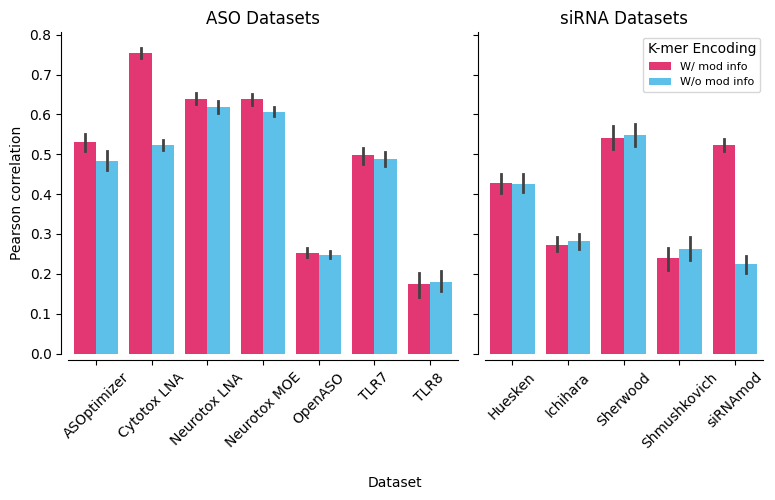

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), width_ratios=[1.4, 1], sharey=True)
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean().reset_index()
featurizer_args_df = data_plot['featurizer_args'].apply(eval).apply(pd.Series)
data_plot = pd.concat([data_plot, featurizer_args_df], axis=1)
palette = ['#ff1b6b', '#45caff']
sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='modification_abundance',
    data=data_plot[(data_plot['dataset'].isin(ASO_DATA)) & (data_plot['featurizer'] == 'KMersCounts')], 
    palette=palette,
    hue_order=[True, False],
    ax=ax[0],
    errwidth=2
)
ax[0].set_xlabel("")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('Pearson correlation')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='modification_abundance',
    data=data_plot[(data_plot['dataset'].isin(SIRNA_DATA)) & (data_plot['featurizer'] == 'KMersCounts')], 
    palette=palette,
    hue_order=[True, False],
    ax=ax[1],
    errwidth=2
)
ax[1].set_xlabel("")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('Pearson correlation')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, ['W/ mod info', 'W/o mod info'], title='Featurizer args', fontsize=8)
sns.despine()
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0.55, 1), title="K-mer Encoding", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.supxlabel("Dataset", fontsize=10)
fig.tight_layout()
fig.savefig("figures/kmer_comparison.pdf", bbox_inches='tight')

In [33]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean().reset_index()
data_plot = data_plot[data_plot['featurizer'] == 'KMersCounts']

summary_table = (
    data_plot
    .groupby(['dataset', 'model', 'featurizer_args'])
    .agg(
        mean_performance=('test_pearson_correlation', 'mean'),
        std_performance=('test_pearson_correlation', 'std')
    )
    .reset_index()
)

summary_table['encoding'] = summary_table['featurizer_args'].apply(lambda x: 'No mod' if "False" in x else 'With mod')
summary_table['performance'] = summary_table['mean_performance'].round(2).astype(str) + " ± " + summary_table['std_performance'].round(2).astype(str)
summary_table = summary_table.pivot_table(
    index='dataset', 
    columns=['model', 'encoding'], 
    values='performance',
    aggfunc='first'
)
summary_table = summary_table.reindex(ASO_DATA + SIRNA_DATA)
summary_table

model                 KNN                    Linear                       MLP  \
encoding           No mod     With mod       No mod     With mod       No mod   
dataset                                                                         
OpenASO       0.28 ± 0.02  0.31 ± 0.01  0.31 ± 0.01   0.31 ± 0.0  0.25 ± 0.01   
ASOptimizer   0.58 ± 0.01   0.62 ± 0.0  0.31 ± 0.05  0.23 ± 0.21   0.5 ± 0.05   
TLR7          0.46 ± 0.06  0.48 ± 0.06  0.64 ± 0.12    0.4 ± 0.4  0.51 ± 0.04   
TLR8          0.13 ± 0.09  0.13 ± 0.03  0.37 ± 0.17  0.31 ± 0.16  0.23 ± 0.09   
Cytotox LNA   0.54 ± 0.06  0.76 ± 0.01  0.56 ± 0.01  0.77 ± 0.01  0.48 ± 0.05   
Neurotox LNA  0.63 ± 0.02  0.66 ± 0.02   0.61 ± 0.0  0.63 ± 0.01  0.58 ± 0.03   
Neurotox MOE  0.65 ± 0.01  0.68 ± 0.01   0.54 ± 0.1   0.4 ± 0.37  0.62 ± 0.01   
siRNAmod       0.19 ± 0.1  0.51 ± 0.05  0.18 ± 0.12  0.32 ± 0.25  0.21 ± 0.05   
Sherwood      0.66 ± 0.01  0.66 ± 0.01   0.52 ± 0.0  0.48 ± 0.07  0.49 ± 0.06   
Ichihara       0.3 ± 0.03  0.29 ± 0.03  0.43 ± 0.05    0.4 ± 0.0  0.33 ± 0.06   
Huesken       0.42 ± 0.01  0.43 ± 0.01  0.61 ± 0.02  0.61 ± 0.01  0.55 ± 0.05   
Shmushkovich  0.28 ± 0.05  0.25 ± 0.04  0.19 ± 0.03  0.21 ± 0.03  0.16 ± 0.09   

model                               RF                       XGB               
encoding         With mod       No mod     With mod       No mod     With mod  
dataset                                                                        
OpenASO       0.22 ± 0.02  0.33 ± 0.01  0.34 ± 0.02  0.24 ± 0.02  0.25 ± 0.01  
ASOptimizer   0.53 ± 0.04   0.61 ± 0.0   0.63 ± 0.0   0.6 ± 0.01  0.61 ± 0.01  
TLR7          0.51 ± 0.06  0.52 ± 0.05  0.55 ± 0.04  0.47 ± 0.06  0.48 ± 0.03  
TLR8          0.17 ± 0.14  0.28 ± 0.05  0.31 ± 0.06  0.25 ± 0.06   0.25 ± 0.1  
Cytotox LNA   0.74 ± 0.04  0.55 ± 0.04  0.78 ± 0.01  0.54 ± 0.03  0.78 ± 0.02  
Neurotox LNA  0.59 ± 0.04  0.72 ± 0.01  0.73 ± 0.02  0.68 ± 0.01  0.69 ± 0.03  
Neurotox MOE  0.66 ± 0.01  0.69 ± 0.01  0.71 ± 0.01  0.64 ± 0.02  0.67 ± 0.01  
siRNAmod      0.46 ± 0.04  0.32 ± 0.04  0.61 ± 0.02   0.3 ± 0.04  0.58 ± 0.03  
Sherwood      0.46 ± 0.06   0.71 ± 0.0   0.71 ± 0.0  0.69 ± 0.02  0.69 ± 0.02  
Ichihara      0.32 ± 0.07  0.39 ± 0.02  0.38 ± 0.04  0.31 ± 0.02  0.31 ± 0.03  
Huesken       0.54 ± 0.07  0.55 ± 0.01  0.56 ± 0.01  0.48 ± 0.03  0.49 ± 0.02  
Shmushkovich  0.09 ± 0.09  0.42 ± 0.04  0.41 ± 0.05  0.32 ± 0.05  0.31 ± 0.05

# KMersCounts, effect of K

/tmp/ipykernel_666791/590106455.py:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(
/tmp/ipykernel_666791/590106455.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/590106455.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(
/tmp/ipykernel_666791/590106455.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


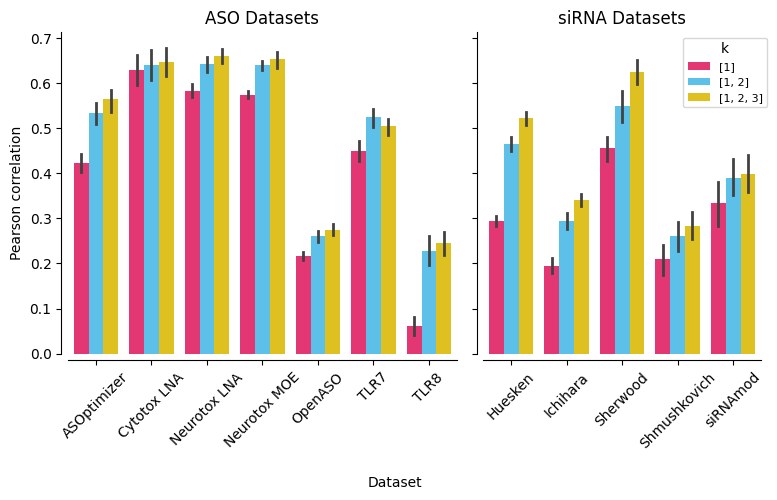

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), width_ratios=[1.4, 1], sharey=True)
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean().reset_index()
featurizer_args_df = data_plot['featurizer_args'].apply(eval).apply(pd.Series)
data_plot = pd.concat([data_plot, featurizer_args_df], axis=1)
data_plot['k'] = data_plot['k'].astype(str)
palette = ['#ff1b6b', '#45caff', "#fed700"]
sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='k',
    data=data_plot[(data_plot['dataset'].isin(ASO_DATA)) & (data_plot['featurizer'] == 'KMersCounts')], 
    palette=palette,
    hue_order=["[1]", "[1, 2]", "[1, 2, 3]"],
    ax=ax[0],
    errwidth=2
)
ax[0].set_xlabel("")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('Pearson correlation')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='test_pearson_correlation',
    hue='k',
    data=data_plot[(data_plot['dataset'].isin(SIRNA_DATA)) & (data_plot['featurizer'] == 'KMersCounts')], 
    palette=palette,
    hue_order=["[1]", "[1, 2]", "[1, 2, 3]"],
    ax=ax[1],
    errwidth=2
)
ax[1].set_xlabel("")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('Pearson correlation')
sns.despine()
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(0.7, 1), title="k", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.supxlabel("Dataset", fontsize=10)
fig.tight_layout()
fig.savefig("figures/kmer_k_comparison.pdf", bbox_inches='tight')

In [35]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean().reset_index()
data_plot = data_plot[data_plot['featurizer'] == 'KMersCounts']

summary_table = (
    data_plot
    .groupby(['dataset', 'model', 'featurizer_args'])
    .agg(
        mean_performance=('test_pearson_correlation', 'mean'),
        std_performance=('test_pearson_correlation', 'std')
    )
    .reset_index()
)

featurizer_args_df = summary_table['featurizer_args'].apply(ast.literal_eval).apply(pd.Series)
summary_table = pd.concat([summary_table, featurizer_args_df], axis=1)
summary_table['performance'] = summary_table['mean_performance'].round(2).astype(str) + " ± " + summary_table['std_performance'].round(2).astype(str)
summary_table['k'] = summary_table['k'].astype(str)
summary_table = summary_table.pivot_table(
    index='dataset', 
    columns=['model', 'k'], 
    values='performance',
    aggfunc='first'
)
summary_table = summary_table.reindex(ASO_DATA + SIRNA_DATA)
summary_table

model                 KNN                                 Linear               \
k               [1, 2, 3]       [1, 2]          [1]    [1, 2, 3]       [1, 2]   
dataset                                                                         
OpenASO       0.28 ± 0.02  0.25 ± 0.02  0.21 ± 0.01  0.31 ± 0.01  0.31 ± 0.02   
ASOptimizer   0.58 ± 0.01  0.56 ± 0.01  0.36 ± 0.03  0.31 ± 0.05    0.3 ± 0.0   
TLR7          0.46 ± 0.06  0.49 ± 0.02  0.49 ± 0.02  0.64 ± 0.12   0.7 ± 0.01   
TLR8          0.13 ± 0.09  0.17 ± 0.04  0.06 ± 0.03  0.37 ± 0.17   0.52 ± 0.0   
Cytotox LNA   0.54 ± 0.06  0.49 ± 0.03  0.51 ± 0.02  0.56 ± 0.01  0.56 ± 0.02   
Neurotox LNA  0.63 ± 0.02  0.64 ± 0.02  0.61 ± 0.01   0.61 ± 0.0  0.57 ± 0.03   
Neurotox MOE  0.65 ± 0.01  0.63 ± 0.01  0.55 ± 0.01   0.54 ± 0.1  0.57 ± 0.01   
siRNAmod       0.19 ± 0.1  0.18 ± 0.03  0.19 ± 0.02  0.18 ± 0.12  0.23 ± 0.02   
Sherwood      0.66 ± 0.01  0.64 ± 0.01  0.48 ± 0.03   0.52 ± 0.0   0.37 ± 0.0   
Ichihara       0.3 ± 0.03  0.32 ± 0.06  0.14 ± 0.04  0.43 ± 0.05   0.39 ± 0.0   
Huesken       0.42 ± 0.01  0.38 ± 0.03  0.27 ± 0.03  0.61 ± 0.02  0.57 ± 0.01   
Shmushkovich  0.28 ± 0.05   0.3 ± 0.03  0.33 ± 0.07  0.19 ± 0.03  0.09 ± 0.11   

model                              MLP                             \
k                     [1]    [1, 2, 3]       [1, 2]           [1]   
dataset                                                             
OpenASO        0.28 ± 0.0  0.25 ± 0.01  0.23 ± 0.03   0.21 ± 0.02   
ASOptimizer    0.26 ± 0.0   0.5 ± 0.05  0.41 ± 0.05   0.29 ± 0.04   
TLR7           0.52 ± 0.0  0.51 ± 0.04  0.49 ± 0.08   0.43 ± 0.14   
TLR8          0.17 ± 0.02  0.23 ± 0.09   0.1 ± 0.09   0.01 ± 0.06   
Cytotox LNA   0.49 ± 0.04  0.48 ± 0.05  0.47 ± 0.06    0.46 ± 0.1   
Neurotox LNA  0.55 ± 0.03  0.58 ± 0.03  0.54 ± 0.03   0.49 ± 0.05   
Neurotox MOE  0.55 ± 0.01  0.62 ± 0.01  0.57 ± 0.02   0.53 ± 0.03   
siRNAmod      0.07 ± 0.01  0.21 ± 0.05  0.13 ± 0.08  -0.01 ± 0.05   
Sherwood       0.26 ± 0.0  0.49 ± 0.06  0.37 ± 0.05   0.33 ± 0.03   
Ichihara       0.22 ± 0.0  0.33 ± 0.06  0.29 ± 0.09   0.21 ± 0.09   
Huesken       0.34 ± 0.01  0.55 ± 0.05  0.49 ± 0.06   0.28 ± 0.06   
Shmushkovich  0.09 ± 0.01  0.16 ± 0.09  0.09 ± 0.07   0.05 ± 0.15   

model                  RF                                    XGB               \
k               [1, 2, 3]       [1, 2]          [1]    [1, 2, 3]       [1, 2]   
dataset                                                                         
OpenASO       0.33 ± 0.01  0.31 ± 0.01  0.22 ± 0.01  0.24 ± 0.02  0.22 ± 0.02   
ASOptimizer    0.61 ± 0.0   0.59 ± 0.0   0.43 ± 0.0   0.6 ± 0.01  0.58 ± 0.01   
TLR7          0.52 ± 0.05  0.55 ± 0.02  0.47 ± 0.04  0.47 ± 0.06  0.48 ± 0.05   
TLR8          0.28 ± 0.05  0.29 ± 0.06  0.12 ± 0.05  0.25 ± 0.06  0.21 ± 0.05   
Cytotox LNA   0.55 ± 0.04  0.55 ± 0.03  0.55 ± 0.02  0.54 ± 0.03  0.54 ± 0.03   
Neurotox LNA  0.72 ± 0.01   0.7 ± 0.02  0.62 ± 0.01  0.68 ± 0.01  0.66 ± 0.02   
Neurotox MOE  0.69 ± 0.01  0.67 ± 0.01  0.57 ± 0.01  0.64 ± 0.02  0.63 ± 0.01   
siRNAmod      0.32 ± 0.04  0.31 ± 0.03  0.26 ± 0.04   0.3 ± 0.04   0.3 ± 0.04   
Sherwood       0.71 ± 0.0   0.67 ± 0.0   0.54 ± 0.0  0.69 ± 0.02  0.62 ± 0.02   
Ichihara      0.39 ± 0.02  0.34 ± 0.03  0.21 ± 0.06  0.31 ± 0.02  0.25 ± 0.05   
Huesken       0.55 ± 0.01   0.5 ± 0.01   0.3 ± 0.02  0.48 ± 0.03  0.42 ± 0.03   
Shmushkovich  0.42 ± 0.04  0.38 ± 0.05  0.31 ± 0.03  0.32 ± 0.05  0.33 ± 0.05   

model                      
k                     [1]  
dataset                    
OpenASO        0.2 ± 0.02  
ASOptimizer    0.43 ± 0.0  
TLR7          0.38 ± 0.07  
TLR8          0.04 ± 0.06  
Cytotox LNA   0.55 ± 0.02  
Neurotox LNA  0.58 ± 0.02  
Neurotox MOE  0.56 ± 0.01  
siRNAmod      0.26 ± 0.04  
Sherwood       0.54 ± 0.0  
Ichihara      0.18 ± 0.04  
Huesken       0.29 ± 0.01  
Shmushkovich  0.31 ± 0.06

## Dataset Statistics

In [36]:
dataset_keys = data.dataset_unformatted.unique()
dataset_stats = pd.DataFrame(index=dataset_keys, columns=["modality","# measurements", "# compounds",  "# targets", "description"])
downloader = DatasetDownloader()
single_dataset_list = []

for i in dataset_keys:
    single_dataset = downloader.download(i)
    single_dataset_data = single_dataset.data
    single_dataset_data["dataset"] = i
    single_dataset_list.append(single_dataset_data)
    dataset_stats.at[i, "modality"] = single_dataset.modality
    dataset_stats.at[i, "# measurements"] = single_dataset.size
    dataset_stats.at[i, "# targets"] = single_dataset.num_targets
    dataset_stats.at[i, "# compounds"] = len(set(single_dataset.x))
    dataset_stats.at[i, "description"] = single_dataset.desc

dataset_stats.reset_index(names="dataset", inplace=True)
dataset_stats['dataset'] = dataset_stats['dataset'].replace(SIRNA_MAP)
dataset_stats['dataset'] = dataset_stats['dataset'].replace(ASO_MAP)

In [37]:
dataset_stats

,dataset,modality,# measurements,# compounds,# targets,description
0,OpenASO,ASO,3913,3868,110,An ASO-activity dataset collected by IDT from ...
1,ASOptimizer,ASO,32602,20749,18,A collection of inhibitory activity for differ...
2,siRNAmod,siRNA,907,823,1,A curated siRNA potency dataset that contain o...
3,Sherwood,shRNA,291551,239845,17802,A biased screening of shRNA using the miR-30 s...
4,Shmushkovich,siRNA,356,356,0,Study of cholesterol-conjugated siRNA efficacy...
5,Ichihara,siRNA,419,419,12,A precurated collection of unmodified siRNA po...
6,Huesken,siRNA,2431,2431,30,A precurated collection of unmodified siRNA po...
7,TLR8,ASO,192,192,4,2'OMe gapmer screen of TLR7 inhibition
8,TLR7,ASO,192,192,4,2'OMe gapmer screen of TLR8 potentiation
9,Cytotox LNA,ASO,768,768,1,A study looking at the relationship between nu...


In [38]:
print(dataset_stats.to_latex(escape=False, column_format='l' + 'c' * len(dataset_stats.columns), label='tab:dataset_statistics_table', caption='Summary of each dataset provided in this study. All datasets are regression tasks.'))

\begin{table}
\caption{Summary of each dataset provided in this study. All datasets are regression tasks.}
\label{tab:dataset_statistics_table}
\begin{tabular}{lcccccc}
\toprule
 & dataset & modality & # measurements & # compounds & # targets & description \\
\midrule
0 & OpenASO & ASO & 3913 & 3868 & 110 & An ASO-activity dataset collected by IDT from a now defunct ASO database (https://doi.org/10.1093/bioinformatics/16.9.843) and also from patent data. According to the publication each ASO have a full phosphothioate backbone and no chimeric sequences. \\
1 & ASOptimizer & ASO & 32602 & 20749 & 18 & A collection of inhibitory activity for different gapmers ASO collected from various patents and publication \\
2 & siRNAmod & siRNA & 907 & 823 & 1 & A curated siRNA potency dataset that contain only sugar and base information. \\
3 & Sherwood & shRNA & 291551 & 239845 & 17802 & A biased screening of shRNA using the miR-30 scaffold, DSIR algorithm was used to select for sequences likely t

## Dataset distribution

In [39]:
formatted_dataset_keys = dataset_stats.dataset.to_list()
all_dataset = pd.concat(single_dataset_list)

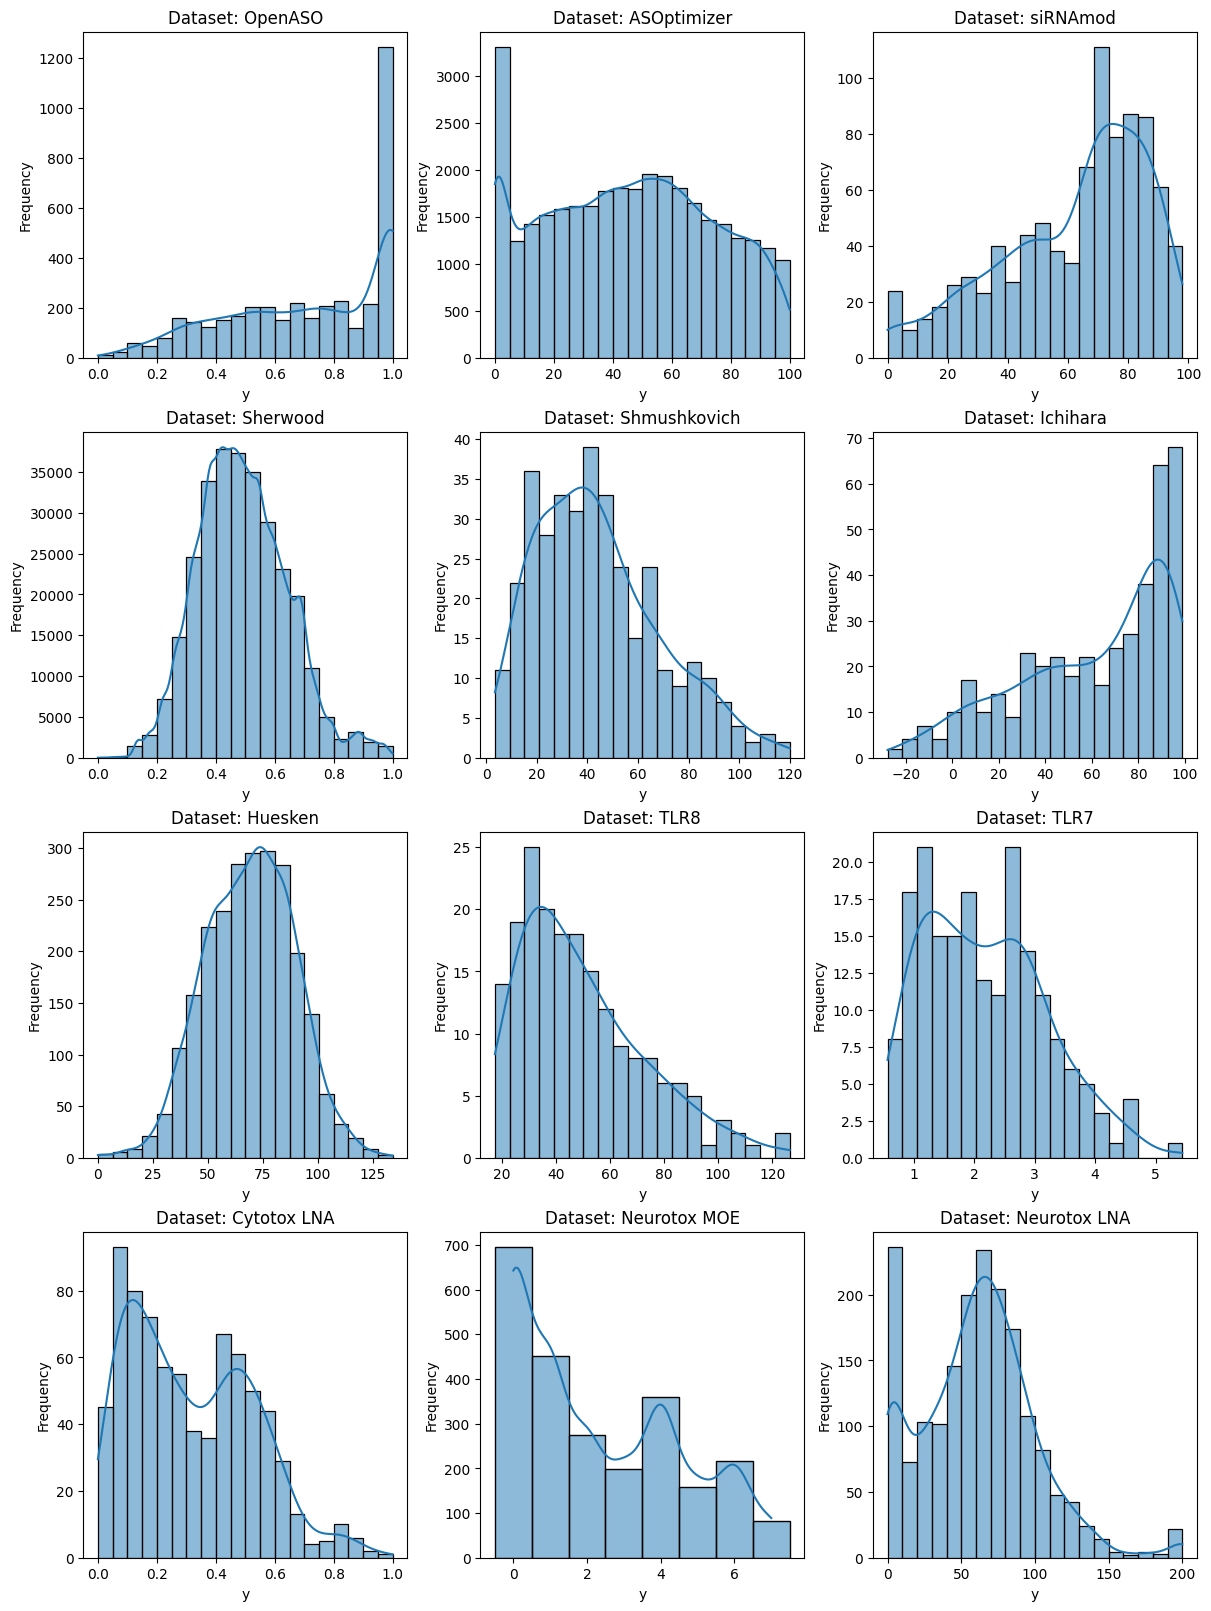

In [40]:
n_cols = 3 
n_rows = (len(formatted_dataset_keys) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, j in enumerate(dataset_keys):
    subset = all_dataset[all_dataset['dataset'] == j]
    if j == "acute_neurotox_moe_cleaned":
        sns.histplot(subset['y'], bins=20, kde=True, ax=axes[i], discrete=True)
    else:
        sns.histplot(subset['y'], bins=20, kde=True, ax=axes[i], discrete=False)
    axes[i].set_title(f"Dataset: {formatted_dataset_keys[i]}")
    axes[i].set_xlabel("y")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Performance distribution

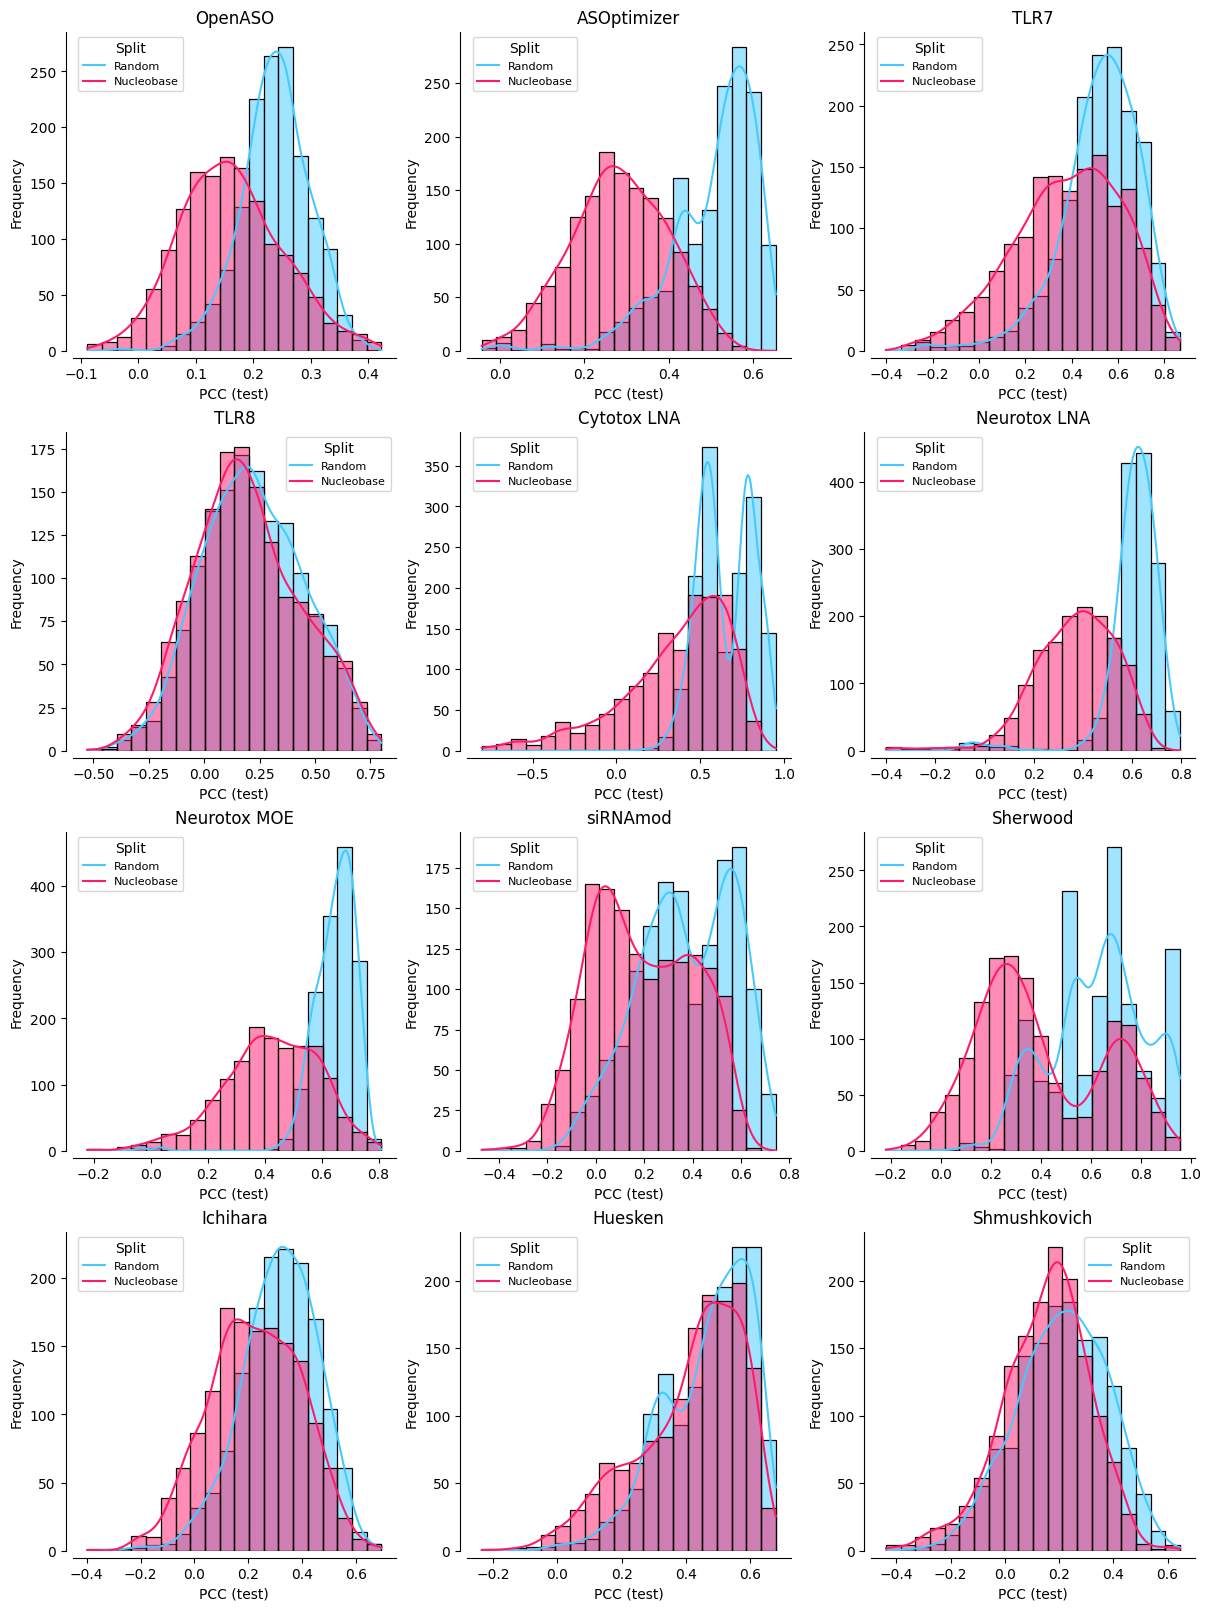

In [41]:
n_cols = 3 
n_rows = (len(formatted_dataset_keys) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), constrained_layout=True,)
axes = axes.flatten()

for i, j in enumerate(ASO_DATA + SIRNA_DATA):
    subset = data[data['dataset'] == j]
    sns.histplot(
        data=subset, 
        x='test_pearson_correlation', 
        bins=20, 
        kde=True,
        ax=axes[i], 
        discrete=False, 
        palette = ['#ff1b6b', '#45caff'],
        hue="cross_validation", 
    )
    axes[i].set_title(f"{j}")
    axes[i].set_xlabel("PCC (test)")
    axes[i].set_ylabel("Frequency")
    axes[i].legend(['Random', 'Nucleobase'], title='Split', fontsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
sns.despine(offset=5)
plt.show()
fig.savefig("figures/performance_distributions.pdf", bbox_inches='tight')

## Performance difference

In [42]:
data_plot = data.loc[data['cross_validation'] == 'random']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_root_mean_squared_error'].idxmin()]
best_models_random = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_pearson_correlation', 'featurizer_args', 'model_args']]

data_plot = data.loc[data['cross_validation'] == 'nucleobase']
data_plot = data_plot.drop(columns=['dataset_unformatted', 'cross_validation', 'train_fold', 'test_fold'])
data_plot = data_plot.groupby(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).mean()
best_models = data_plot.loc[data_plot.groupby(['model', 'dataset'])['test_root_mean_squared_error'].idxmin()]
best_models_nucleobase = best_models.reset_index()[['dataset', 'model', 'featurizer', 'test_pearson_correlation', 'featurizer_args', 'model_args']]

data_random = (
    data
    .loc[data['cross_validation'] == 'random']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models_random.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_root_mean_squared_error', 'featurizer_args', 'model_args']]
)

data_nucleobase = (
    data
    .loc[data['cross_validation'] == 'random']
    .set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args'])
    .loc[best_models_nucleobase.set_index(['dataset', 'model', 'model_args', 'featurizer', 'featurizer_args']).index]
    .reset_index()
    [['dataset', 'model', 'test_root_mean_squared_error', 'featurizer_args', 'model_args']]
)

data_random = data_random.groupby(['dataset', 'model']).mean('test_root_mean_squared_error').reset_index()
data_nucleobase = data_nucleobase.groupby(['dataset', 'model']).mean('test_root_mean_squared_error').reset_index()

In [43]:
data_diff = pd.DataFrame(
    {
        'dataset': data_random['dataset'],
        'model': data_random['model'],
        'diff': data_random['test_root_mean_squared_error'] - data_nucleobase['test_root_mean_squared_error'],
        "rmse_random": data_random['test_root_mean_squared_error'],
        "rmse_nucleobase": data_nucleobase['test_root_mean_squared_error'],
    }
)

/tmp/ipykernel_666791/2688462568.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/2688462568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_666791/2688462568.py:19: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(
/tmp/ipykernel_666791/2688462568.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


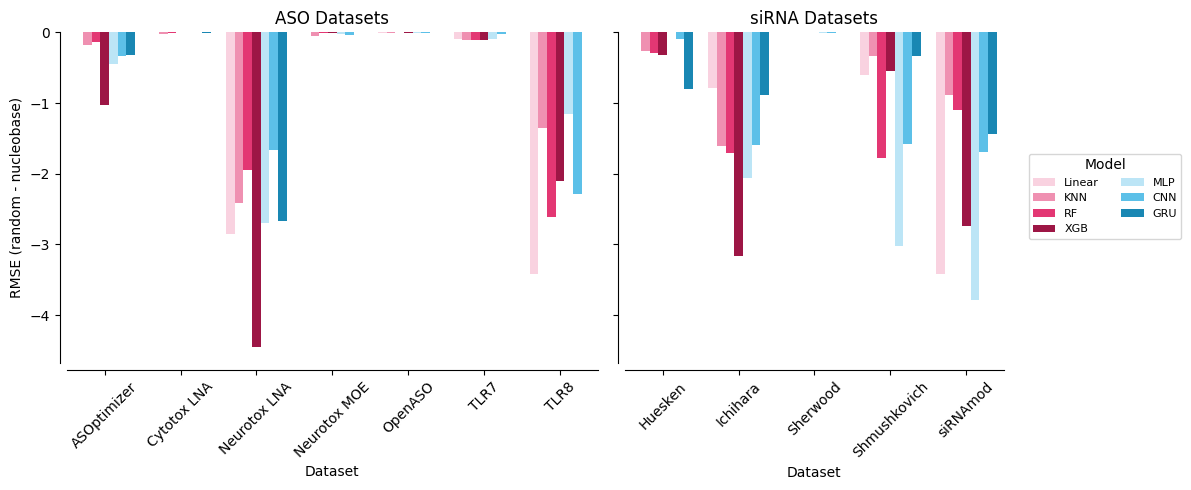

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), width_ratios=[1.4, 1], sharey=True)
sns.barplot(
    x='dataset', 
    y='diff',
    hue='model',
    data=data_diff[data_diff['dataset'].isin(ASO_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[0],
    errwidth=1
)
ax[0].set_xlabel("Dataset")
ax[0].set_title("ASO Datasets") 
ax[0].set_ylabel('RMSE (random - nucleobase)')
ax[0].legend_.remove()
sns.despine(offset=5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(
    x='dataset', 
    y='diff',
    hue='model',
    data=data_diff[data_diff['dataset'].isin(SIRNA_DATA)], 
    palette=model_palette,
    hue_order=model_palette.keys(),
    ax=ax[1],
    errwidth=1
)
ax[1].set_xlabel("Dataset")
ax[1].set_title("siRNA Datasets") 
ax[1].set_ylabel('RMSE (random - nucleobase)')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title="Model", fontsize=8, ncol=2)
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1.05, 0.65), title="Model", ncols=2, fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
fig.tight_layout()
fig.savefig("figures/rmse_diff.pdf", bbox_inches='tight')